In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

In [134]:
data = pd.read_csv("fetal_health.csv")

### Context

Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

### Data

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

* Normal
* Suspect
* Pathological

### Features

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* '**uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability
* '**histogram_width**' Width of FHR histogram
* '**histogram_min**' Minimum (low frequency) of FHR histogram
* '**histogram_max**' Maximum (high frequency) of FHR histogram
* '**histogram_number_of_peaks**' Number of histogram peaks
* '**histogram_number_of_zeroes**' Number of histogram zeros
* '**histogram_mode**' Histogram mode
* '**histogram_mean**' Histogram mean
* '**histogram_median**' Histogram median
* '**histogram_variance**' Histogram variance
* '**histogram_tendency**' Histogram tendency

### Target

'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [135]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [136]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [137]:
# Check if there is any missing value

data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

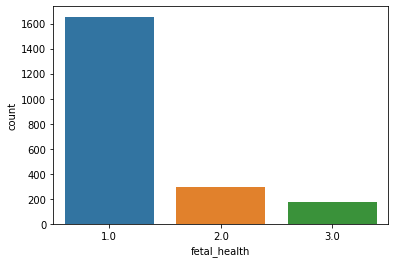

In [139]:
print(data['fetal_health'].value_counts())
sns.countplot(data=data, x = 'fetal_health')

Data in unbalanced

# Visualization

<AxesSubplot:>

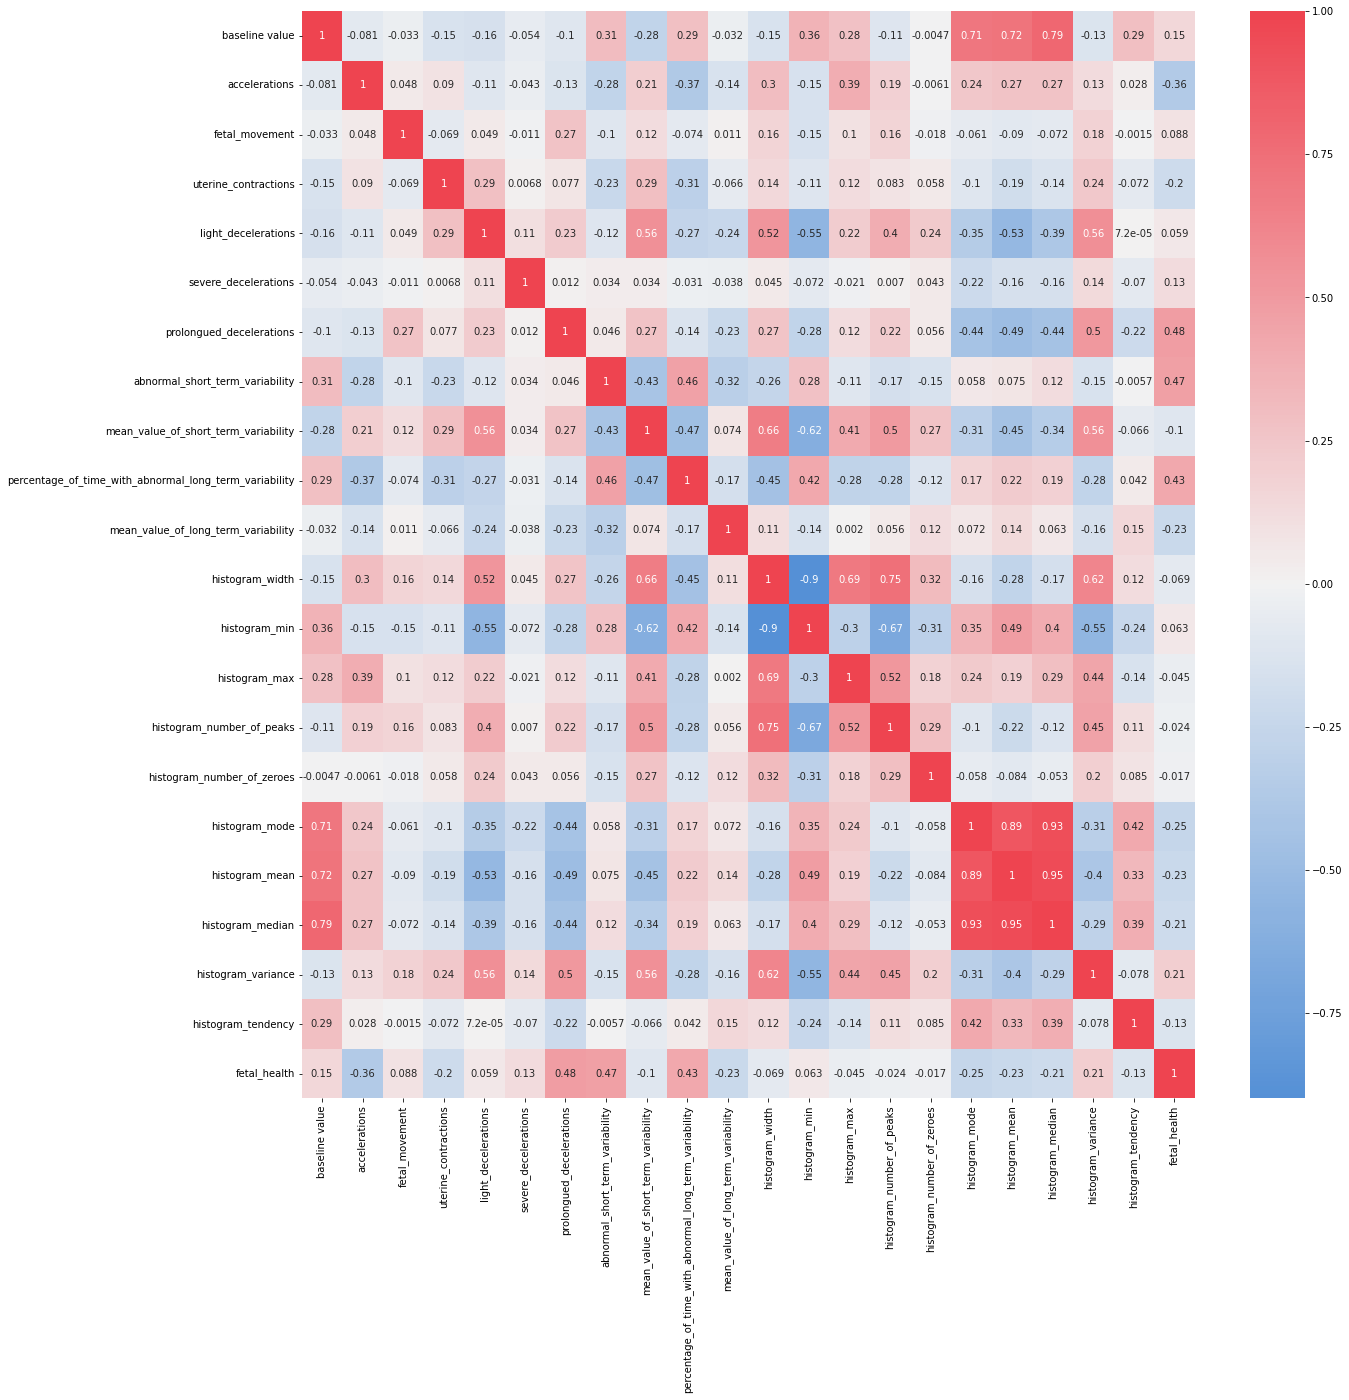

In [140]:
# Correlation matrix

corrmat= data.corr()
plt.figure(figsize=(20,20))  
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap = cmap, center=0)

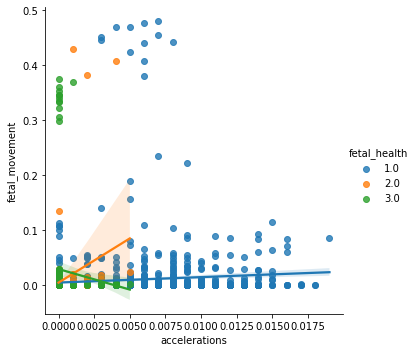

In [141]:
sns.lmplot(data =data,x="accelerations",y="fetal_movement", hue="fetal_health")

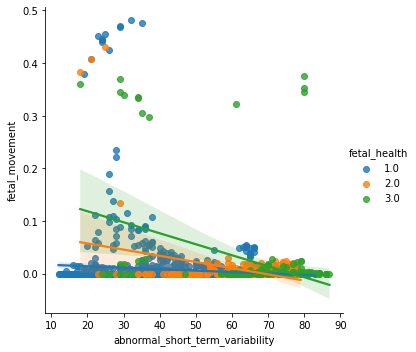

In [142]:
sns.lmplot(data=data, x= 'abnormal_short_term_variability', y='fetal_movement', hue='fetal_health')

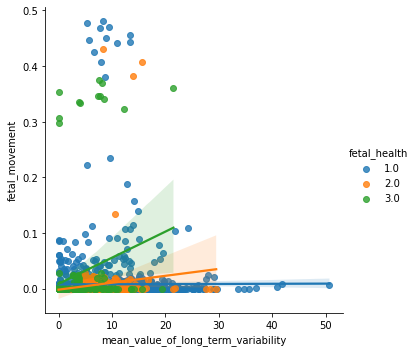

In [143]:
sns.lmplot(data =data,x="mean_value_of_long_term_variability",y="fetal_movement", hue="fetal_health")

* We can see the rates of change of the above-mentioned values with each target show a specific trend. We can also spot outliers.

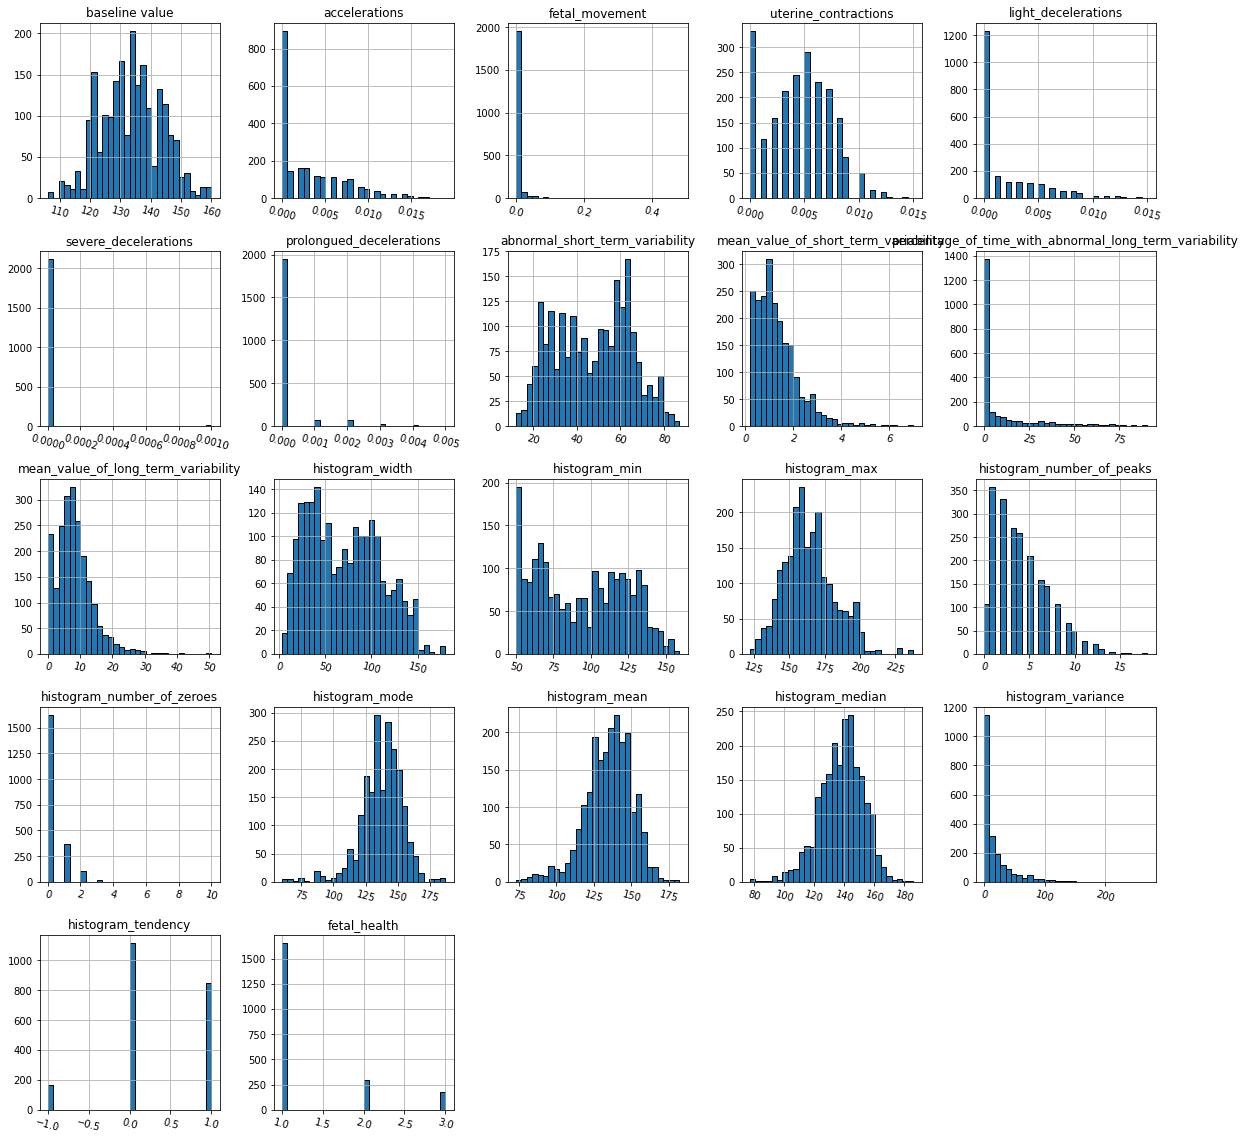

In [144]:
h = data.hist(bins=30,figsize=(20,20),xlabelsize='10',ylabelsize='10',xrot=-15, edgecolor="black")

In [145]:
# Splitting data into Input and Output
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

In [146]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [147]:
# Standardize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [148]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Accuracy':[],
                           'Recall':[],
                           'Precision':[],
                           'F1 Score': [],
                           '5-Fold Cross Validation':[]})

# Metrics 

* Accuracy - Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same. Therefore, you have to look at other parameters to evaluate the performance of your model. For our model, we have got 0.803 which means our model is approx. 80% accurate.

Accuracy = TP+TN/TP+FP+FN+TN

* Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

* Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

* F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [149]:
def metric(y_test, pred, clf, X_train, y_train):
    accuracy = float(format(accuracy_score(y_test,pred),'.3f'))
    recall = float(format(recall_score(y_test,pred, average="weighted"),'.3f'))
    precision = float(format(precision_score(y_test, pred, average="weighted"),'.3f'))
    F1_score = float(format(f1_score(y_test,pred, average="weighted"),'.3f'))
    cv = float(format(cross_val_score(clf, X_train,y_train,scoring='f1_weighted',cv=5).mean(), '.3f'))

    return accuracy, recall, precision, F1_score, cv

# Logistic Regression

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional ,  or Elastic-Net regularization.

In [150]:
def lr(penalty, solver):
    lr = LogisticRegression(random_state=0, max_iter=200, penalty = penalty, solver = solver).fit(X_train, y_train)
    pred = lr.predict(X_test)

    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, lr, X_train, y_train)
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    
    print(penalty)
    # plot_confusion_matrix(lr, X_test, y_test)
  
    return result

In [151]:
result = lr('l1', 'liblinear')
result1 = lr('l2', 'lbfgs')

r = evaluation.shape[0]
evaluation.loc[r] = ['Logistic Regression','l1 regurlization',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['Logistic Regression','l2 regurlization',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

l1
l2


,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
0,Logistic Regression,l1 regurlization,0.892,0.892,0.891,0.891,0.891
1,Logistic Regression,l2 regurlization,0.890,0.890,0.888,0.889,0.889


# K Neighrest Neighbors

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the  nearest neighbors of each query point, where  is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius  of each training point, where  is a floating-point value specified by the user.

The -neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value  is highly data-dependent: in general a larger suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius , such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied to compute the weights.

In [152]:
from sklearn.neighbors import KNeighborsClassifier

def knn(k, weights):
    clf = KNeighborsClassifier(n_neighbors=k, weights=weights).fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    # plot_confusion_matrix(clf, X_test, y_test)
    return result

In [153]:
result = knn(5,'uniform')
result1 = knn(5,'distance')
result2 = knn(10,'uniform')
result3 = knn(10,'distance')

r = evaluation.shape[0]
evaluation.loc[r] = ['K Neighrest Neighbors','k=5, weight=uniform',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['K Neighrest Neighbors','k=5, weight=distance',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.loc[r+2] = ['K Neighrest Neighbors','k=10, weight=uniform',result2[0],result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+3] = ['K Neighrest Neighbors','k=10, weight=distance',result3[0],result3[1],result3[2], result3[3],result3[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
3,K Neighrest Neighbors,"k=5, weight=distance",0.904,0.904,0.900,0.901,0.910
2,K Neighrest Neighbors,"k=5, weight=uniform",0.897,0.897,0.892,0.893,0.900
5,K Neighrest Neighbors,"k=10, weight=distance",0.904,0.904,0.900,0.900,0.900
0,Logistic Regression,l1 regurlization,0.892,0.892,0.891,0.891,0.891
1,Logistic Regression,l2 regurlization,0.890,0.890,0.888,0.889,0.889
4,K Neighrest Neighbors,"k=10, weight=uniform",0.899,0.899,0.896,0.893,0.886


# Support Vector Machine

* In machine learning, support-vector machines (SVMs, also support-vector network) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. 

* Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

* In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [154]:
from sklearn.svm import SVC

def svm(kernel):
    clf = SVC(kernel=kernel).fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    # plot_confusion_matrix(clf, X_test, y_test)
    return result

In [155]:
result = svm('linear')
result1 = svm('rbf')
result2 = svm('poly')
result3 = svm('sigmoid')

r = evaluation.shape[0]
evaluation.loc[r] = ['SVM','kernel=linear',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['SVM','kernel=rbf',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.loc[r+2] = ['SVM','kernel=poly',result2[0],result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+3] = ['SVM','kernel=sigmoid',result3[0],result3[1],result3[2], result3[3],result3[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
3,K Neighrest Neighbors,"k=5, weight=distance",0.904,0.904,0.900,0.901,0.910
7,SVM,kernel=rbf,0.901,0.901,0.898,0.898,0.908
2,K Neighrest Neighbors,"k=5, weight=uniform",0.897,0.897,0.892,0.893,0.900
5,K Neighrest Neighbors,"k=10, weight=distance",0.904,0.904,0.900,0.900,0.900
6,SVM,kernel=linear,0.899,0.899,0.897,0.897,0.897
8,SVM,kernel=poly,0.894,0.894,0.889,0.888,0.892
0,Logistic Regression,l1 regurlization,0.892,0.892,0.891,0.891,0.891
1,Logistic Regression,l2 regurlization,0.890,0.890,0.888,0.889,0.889
4,K Neighrest Neighbors,"k=10, weight=uniform",0.899,0.899,0.896,0.893,0.886
9,SVM,kernel=sigmoid,0.761,0.761,0.753,0.756,0.799


# Naive Bayes Classifier

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In many practical applications, parameter estimation for naive Bayes models uses the method of maximum likelihood; in other words, one can work with the naive Bayes model without accepting Bayesian probability or using any Bayesian methods.

Despite their naive design and apparently oversimplified assumptions, naive Bayes classifiers have worked quite well in many complex real-world situations. In 2004, an analysis of the Bayesian classification problem showed that there are sound theoretical reasons for the apparently implausible efficacy of naive Bayes classifiers. Still, a comprehensive comparison with other classification algorithms in 2006 showed that Bayes classification is outperformed by other approaches, such as boosted trees or random forests.

An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification.

In [156]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

def gnb():
    clf = GaussianNB().fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    # plot_confusion_matrix(clf, X_test, y_test)
    return result
def mnb():
    clf = MultinomialNB().fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    # plot_confusion_matrix(clf, X_test, y_test)
    return result
def cnb():
    clf = ComplementNB().fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    # plot_confusion_matrix(clf, X_test, y_test)
    return result
def bnb():
    clf = BernoulliNB().fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    # plot_confusion_matrix(clf, X_test, y_test)
    return result
def catnb():
    clf = CategoricalNB().fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    # plot_confusion_matrix(clf, X_test, y_test)
    return result

In [161]:
result = gnb()
# result1 = mnb()
# result2 = cnb()
result3 = bnb()
# result4 = catnb()

r = evaluation.shape[0]
evaluation.loc[r] = ['Naive Bayes','Gaussian',result[0],result[1],result[2], result[3],result[4]]
# evaluation.loc[r+1] = ['Naive Bayes','Multinomial',result1[0],result1[1],result1[2], result1[3],result1[4]]
# evaluation.loc[r+1] = ['Naive Bayes','Complement',result2[0] ,result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+1] = ['Naive Bayes','Bernoulli',result3[0],result3[1],result3[2], result3[3],result3[4]]
# evaluation.loc[r+2] = ['Naive Bayes','Categorical',result4[0],result4[1],result4[2], result4[3],result4[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
3,K Neighrest Neighbors,"k=5, weight=distance",0.904,0.904,0.900,0.901,0.910
7,SVM,kernel=rbf,0.901,0.901,0.898,0.898,0.908
2,K Neighrest Neighbors,"k=5, weight=uniform",0.897,0.897,0.892,0.893,0.900
5,K Neighrest Neighbors,"k=10, weight=distance",0.904,0.904,0.900,0.900,0.900
6,SVM,kernel=linear,0.899,0.899,0.897,0.897,0.897
8,SVM,kernel=poly,0.894,0.894,0.889,0.888,0.892
0,Logistic Regression,l1 regurlization,0.892,0.892,0.891,0.891,0.891
1,Logistic Regression,l2 regurlization,0.890,0.890,0.888,0.889,0.889
4,K Neighrest Neighbors,"k=10, weight=uniform",0.899,0.899,0.896,0.893,0.886
11,Naive Bayes,Bernoulli,0.798,0.798,0.851,0.814,0.817


# Decision Tree

* Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.


In [162]:
from sklearn.tree import DecisionTreeClassifier

def dtc(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth).fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []

    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)
    
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]

    return result

In [163]:
result = dtc(5)
result1 = dtc(10)
result2 = dtc(15)
result3 = dtc(20)

r = evaluation.shape[0]
evaluation.loc[r] = ['Decision Tree','max_depth=5',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['Decision Tree','max_depth=10',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.loc[r+2] = ['Decision Tree','max_depth=15',result2[0] ,result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+3] = ['Decision Tree','max_depth=20',result3[0],result3[1],result3[2], result3[3],result3[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
13,Decision Tree,max_depth=10,0.930,0.930,0.927,0.928,0.933
15,Decision Tree,max_depth=20,0.946,0.946,0.945,0.945,0.926
14,Decision Tree,max_depth=15,0.927,0.927,0.926,0.926,0.925
12,Decision Tree,max_depth=5,0.918,0.918,0.916,0.912,0.921
3,K Neighrest Neighbors,"k=5, weight=distance",0.904,0.904,0.900,0.901,0.910
7,SVM,kernel=rbf,0.901,0.901,0.898,0.898,0.908
2,K Neighrest Neighbors,"k=5, weight=uniform",0.897,0.897,0.892,0.893,0.900
5,K Neighrest Neighbors,"k=10, weight=distance",0.904,0.904,0.900,0.900,0.900
6,SVM,kernel=linear,0.899,0.899,0.897,0.897,0.897
8,SVM,kernel=poly,0.894,0.894,0.889,0.888,0.892


# Random Forest Classifier

* In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

* Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features.

* The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.



In [164]:
from sklearn.ensemble import RandomForestClassifier

def rf(n_estimators):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_features='sqrt', random_state=0).fit(X_train,y_train)
    pred = clf.predict(X_test)
    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)  
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    return result

In [165]:
result = rf(5)
result1 = rf(10)
result2 = rf(15)
result3 = rf(20)

r = evaluation.shape[0]
evaluation.loc[r] = ['Random Forest','n_estimators=5',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['Random Forest','n_estimators=10',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.loc[r+2] = ['Random Forest','n_estimators=15',result2[0] ,result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+3] = ['Random Forest','n_estimators=20',result3[0],result3[1],result3[2], result3[3],result3[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
18,Random Forest,n_estimators=15,0.934,0.934,0.933,0.932,0.933
13,Decision Tree,max_depth=10,0.930,0.930,0.927,0.928,0.933
19,Random Forest,n_estimators=20,0.923,0.923,0.920,0.920,0.932
17,Random Forest,n_estimators=10,0.925,0.925,0.923,0.922,0.928
15,Decision Tree,max_depth=20,0.946,0.946,0.945,0.945,0.926
14,Decision Tree,max_depth=15,0.927,0.927,0.926,0.926,0.925
16,Random Forest,n_estimators=5,0.906,0.906,0.902,0.903,0.921
12,Decision Tree,max_depth=5,0.918,0.918,0.916,0.912,0.921
3,K Neighrest Neighbors,"k=5, weight=distance",0.904,0.904,0.900,0.901,0.910
7,SVM,kernel=rbf,0.901,0.901,0.898,0.898,0.908


# AdaBoost Classsfier

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights $w_{1},w_{2} , …,w_{N}$  to each of the training samples. Initially, those weights are all set to $w_{i}=1/N$ , so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

In [166]:
from sklearn.ensemble import AdaBoostClassifier

def ABC(n_estimators,max_depth):
    clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=0),n_estimators=n_estimators).fit(X_train,y_train)
    pred = clf.predict(X_test)
    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)  
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    return result

In [167]:
result = ABC(5,5)
result1 = ABC(10,10)
result2 = ABC(15,15)
result3 = ABC(100,100)

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoostClassifier','n_estimators=5, max_depth=5',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['AdaBoostClassifier','n_estimators=10, max_depth=10',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.loc[r+2] = ['AdaBoostClassifier','n_estimators=15, max_depth=15',result2[0] ,result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+3] = ['AdaBoostClassifier','n_estimators=100, max_depth=100',result3[0],result3[1],result3[2], result3[3],result3[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
22,AdaBoostClassifier,"n_estimators=15, max_depth=15",0.934,0.934,0.932,0.932,0.938
21,AdaBoostClassifier,"n_estimators=10, max_depth=10",0.939,0.939,0.938,0.938,0.938
23,AdaBoostClassifier,"n_estimators=100, max_depth=100",0.930,0.930,0.928,0.928,0.937
13,Decision Tree,max_depth=10,0.930,0.930,0.927,0.928,0.933
18,Random Forest,n_estimators=15,0.934,0.934,0.933,0.932,0.933
19,Random Forest,n_estimators=20,0.923,0.923,0.920,0.920,0.932
17,Random Forest,n_estimators=10,0.925,0.925,0.923,0.922,0.928
15,Decision Tree,max_depth=20,0.946,0.946,0.945,0.945,0.926
14,Decision Tree,max_depth=15,0.927,0.927,0.926,0.926,0.925
16,Random Forest,n_estimators=5,0.906,0.906,0.902,0.903,0.921


# Gradient Boosting Classifier

GradientBoostingClassifier supports both binary and multi-class classification.

The number of weak learners (i.e. regression trees) is controlled by the parameter n_estimators; The size of each tree can be controlled either by setting the tree depth via max_depth or by setting the number of leaf nodes via max_leaf_nodes. The learning_rate is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage.

In [168]:
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

def GBC(n_estimators, learning_rate):
    clf = GradientBoostingClassifier(n_estimators=n_estimators,learning_rate=learning_rate,random_state=0).fit(X_train,y_train)
    pred = clf.predict(X_test)
    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)  
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    return result
    
def HGBC(max_depth, learning_rate):
    clf = HistGradientBoostingClassifier(max_depth=max_depth,learning_rate=learning_rate,random_state=0).fit(X_train,y_train)
    pred = clf.predict(X_test)
    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)  
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    return result

In [169]:
result = GBC(5,0.1)
result1 = GBC(10,0.1)
result2 = GBC(15,0.1)
result3 = GBC(30,0.1)

r = evaluation.shape[0]
evaluation.loc[r] = ['GradientBoostingClassifier','n_estimators=5, learning_rate=0.1',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['GradientBoostingClassifier','n_estimators=10, learning_rate=0.1',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.loc[r+2] = ['GradientBoostingClassifier','n_estimators=15, learning_rate=0.1',result2[0] ,result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+3] = ['GradientBoostingClassifier','n_estimators=30, learning_rate=0.1',result3[0],result3[1],result3[2], result3[3],result3[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
27,GradientBoostingClassifier,"n_estimators=30, learning_rate=0.1",0.944,0.944,0.942,0.941,0.945
22,AdaBoostClassifier,"n_estimators=15, max_depth=15",0.934,0.934,0.932,0.932,0.938
21,AdaBoostClassifier,"n_estimators=10, max_depth=10",0.939,0.939,0.938,0.938,0.938
23,AdaBoostClassifier,"n_estimators=100, max_depth=100",0.930,0.930,0.928,0.928,0.937
26,GradientBoostingClassifier,"n_estimators=15, learning_rate=0.1",0.937,0.937,0.937,0.933,0.934
13,Decision Tree,max_depth=10,0.930,0.930,0.927,0.928,0.933
18,Random Forest,n_estimators=15,0.934,0.934,0.933,0.932,0.933
19,Random Forest,n_estimators=20,0.923,0.923,0.920,0.920,0.932
17,Random Forest,n_estimators=10,0.925,0.925,0.923,0.922,0.928
15,Decision Tree,max_depth=20,0.946,0.946,0.945,0.945,0.926


In [170]:
result = HGBC(5,0.1)
result1 = HGBC(10,0.1)
result2 = HGBC(15,0.1)
result3 = HGBC(20,0.1)

r = evaluation.shape[0]
evaluation.loc[r] = ['HistGradientBoostingClassifier','max_depth=5, learning_rate=0.1',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['HistGradientBoostingClassifier','max_depth=10, learning_rate=0.1',result1[0],result1[1],result1[2], result1[3],result1[4]]
evaluation.loc[r+2] = ['HistGradientBoostingClassifier','max_depth=15, learning_rate=0.1',result2[0] ,result2[1],result2[2], result2[3],result2[4]]
evaluation.loc[r+3] = ['HistGradientBoostingClassifier','max_depth=20, learning_rate=0.1',result3[0],result3[1],result3[2], result3[3],result3[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
28,HistGradientBoostingClassifier,"max_depth=5, learning_rate=0.1",0.953,0.953,0.952,0.952,0.957
30,HistGradientBoostingClassifier,"max_depth=15, learning_rate=0.1",0.946,0.946,0.945,0.946,0.956
31,HistGradientBoostingClassifier,"max_depth=20, learning_rate=0.1",0.946,0.946,0.945,0.946,0.955
29,HistGradientBoostingClassifier,"max_depth=10, learning_rate=0.1",0.948,0.948,0.948,0.948,0.955
27,GradientBoostingClassifier,"n_estimators=30, learning_rate=0.1",0.944,0.944,0.942,0.941,0.945
22,AdaBoostClassifier,"n_estimators=15, max_depth=15",0.934,0.934,0.932,0.932,0.938
21,AdaBoostClassifier,"n_estimators=10, max_depth=10",0.939,0.939,0.938,0.938,0.938
23,AdaBoostClassifier,"n_estimators=100, max_depth=100",0.930,0.930,0.928,0.928,0.937
26,GradientBoostingClassifier,"n_estimators=15, learning_rate=0.1",0.937,0.937,0.937,0.933,0.934
18,Random Forest,n_estimators=15,0.934,0.934,0.933,0.932,0.933


# Voting Classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.
 
## Majority Class Labels (Majority/Hard Voting)
In majority voting, the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.

E.g., if the prediction for a given sample is

classifier 1 -> class 1

classifier 2 -> class 1

classifier 3 -> class 2

the VotingClassifier (with voting='hard') would classify the sample as “class 1” based on the majority class label.

In the cases of a tie, the VotingClassifier will select the class based on the ascending sort order. E.g., in the following scenario

classifier 1 -> class 2

classifier 2 -> class 1

the class label 1 will be assigned to the sample.

## Weighted Average Probabilities (Soft Voting)

In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.

Specific weights can be assigned to each classifier via the weights parameter. When weights are provided, the predicted class probabilities for each classifier are collected, multiplied by the classifier weight, and averaged. The final class label is then derived from the class label with the highest average probability.


In [171]:
from sklearn.ensemble import VotingClassifier

clf1 = HistGradientBoostingClassifier(max_depth=5,learning_rate=0.1,random_state=0)
clf2 = GradientBoostingClassifier(n_estimators=30,learning_rate=0.1,random_state=0)
clf3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15, random_state=0),n_estimators=15)

def VotingHard():
    clf = VotingClassifier(
        estimators = [('HistGrad', clf1), ('Grad', clf2), ('Ada', clf3)], voting='hard'
    ).fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)  
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    return result
def VotingSoft():
    clf = VotingClassifier(
        estimators = [('HistGrad', clf1), ('Grad', clf2), ('Ada', clf3)], voting='soft'
    ).fit(X_train, y_train)
    pred = clf.predict(X_test)
    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)  
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    return result

In [172]:
result = VotingHard()
result1 = VotingSoft()

r = evaluation.shape[0]
evaluation.loc[r] = ['VotingClassifier','Hard',result[0],result[1],result[2], result[3],result[4]]
evaluation.loc[r+1] = ['VotingClassifier','Soft',result1[0],result1[1],result1[2], result1[3],result1[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
28,HistGradientBoostingClassifier,"max_depth=5, learning_rate=0.1",0.953,0.953,0.952,0.952,0.957
30,HistGradientBoostingClassifier,"max_depth=15, learning_rate=0.1",0.946,0.946,0.945,0.946,0.956
31,HistGradientBoostingClassifier,"max_depth=20, learning_rate=0.1",0.946,0.946,0.945,0.946,0.955
29,HistGradientBoostingClassifier,"max_depth=10, learning_rate=0.1",0.948,0.948,0.948,0.948,0.955
32,VotingClassifier,Hard,0.948,0.948,0.947,0.947,0.953
33,VotingClassifier,Soft,0.944,0.944,0.942,0.942,0.951
27,GradientBoostingClassifier,"n_estimators=30, learning_rate=0.1",0.944,0.944,0.942,0.941,0.945
22,AdaBoostClassifier,"n_estimators=15, max_depth=15",0.934,0.934,0.932,0.932,0.938
21,AdaBoostClassifier,"n_estimators=10, max_depth=10",0.939,0.939,0.938,0.938,0.938
23,AdaBoostClassifier,"n_estimators=100, max_depth=100",0.930,0.930,0.928,0.928,0.937


# Stacking classifier

Stacked generalization is a method for combining estimators to reduce their biases. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

The StackingClassifier and StackingRegressor provide such strategies which can be applied to classification and regression problems.

The estimators parameter corresponds to the list of the estimators which are stacked together in parallel on the input data. It should be given as a list of names and estimators:

In [173]:
from sklearn.ensemble import StackingClassifier

estimators = [('Gradient Boosting', GradientBoostingClassifier(n_estimators=30,learning_rate=0.1,random_state=0)),
            ('Ada Boosting', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15, random_state=0),n_estimators=15)),
            ('RandomForest', RandomForestClassifier(max_depth=15,random_state=0))]

final_estimator = HistGradientBoostingClassifier(max_depth=5,learning_rate=0.1,random_state=0)

def StckClf():
    clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator).fit(X_train,y_train)
    pred = clf.predict(X_test)
    result = []
    accuracy, recall, precision, F1_score, cv = metric(y_test, pred, clf, X_train, y_train)  
    result = result + [accuracy] + [recall] + [precision] + [F1_score] + [cv]
    return result

In [174]:
result = StckClf()

r = evaluation.shape[0]
evaluation.loc[r] = ['StackingClassifier','Gradient, Ada, RandomForest',result[0],result[1],result[2], result[3],result[4]]

evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
28,HistGradientBoostingClassifier,"max_depth=5, learning_rate=0.1",0.953,0.953,0.952,0.952,0.957
30,HistGradientBoostingClassifier,"max_depth=15, learning_rate=0.1",0.946,0.946,0.945,0.946,0.956
31,HistGradientBoostingClassifier,"max_depth=20, learning_rate=0.1",0.946,0.946,0.945,0.946,0.955
29,HistGradientBoostingClassifier,"max_depth=10, learning_rate=0.1",0.948,0.948,0.948,0.948,0.955
32,VotingClassifier,Hard,0.948,0.948,0.947,0.947,0.953
33,VotingClassifier,Soft,0.944,0.944,0.942,0.942,0.951
27,GradientBoostingClassifier,"n_estimators=30, learning_rate=0.1",0.944,0.944,0.942,0.941,0.945
34,StackingClassifier,"Gradient, Ada, RandomForest",0.939,0.939,0.937,0.938,0.942
22,AdaBoostClassifier,"n_estimators=15, max_depth=15",0.934,0.934,0.932,0.932,0.938
21,AdaBoostClassifier,"n_estimators=10, max_depth=10",0.939,0.939,0.938,0.938,0.938


In [175]:
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False, inplace=True)
evaluation.reset_index(inplace=True)
evaluation=evaluation.iloc[:,1:]
evaluation

,Model,Details,Accuracy,Recall,Precision,F1 Score,5-Fold Cross Validation
0,HistGradientBoostingClassifier,"max_depth=5, learning_rate=0.1",0.953,0.953,0.952,0.952,0.957
1,HistGradientBoostingClassifier,"max_depth=15, learning_rate=0.1",0.946,0.946,0.945,0.946,0.956
2,HistGradientBoostingClassifier,"max_depth=20, learning_rate=0.1",0.946,0.946,0.945,0.946,0.955
3,HistGradientBoostingClassifier,"max_depth=10, learning_rate=0.1",0.948,0.948,0.948,0.948,0.955
4,VotingClassifier,Hard,0.948,0.948,0.947,0.947,0.953
5,VotingClassifier,Soft,0.944,0.944,0.942,0.942,0.951
6,GradientBoostingClassifier,"n_estimators=30, learning_rate=0.1",0.944,0.944,0.942,0.941,0.945
7,StackingClassifier,"Gradient, Ada, RandomForest",0.939,0.939,0.937,0.938,0.942
8,AdaBoostClassifier,"n_estimators=15, max_depth=15",0.934,0.934,0.932,0.932,0.938
9,AdaBoostClassifier,"n_estimators=10, max_depth=10",0.939,0.939,0.938,0.938,0.938


In [176]:
evaluation.to_csv("raw.csv")